The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


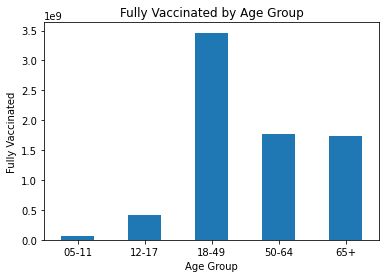

<IPython.core.display.Javascript object>

In [76]:
%load_ext nb_black
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import seaborn as sns

# files
vacc_race_path = "data/vacc_race.csv"
vacc_age_path = "data/vacc_age.csv"
race_path = "data/race_data.csv"
age_path = "data/age_data.csv"

# dataframes
vacc_race = pd.read_csv(vacc_race_path)
vacc_age = pd.read_csv(vacc_age_path)
race = pd.read_csv(race_path)
age = pd.read_csv(age_path)

# replaced wrong values
vacc_age = vacc_age.replace(to_replace="17-Dec", value="12-17")
vacc_age = vacc_age.replace(to_replace="11-May", value="05-11")
vacc_race = vacc_race.replace(to_replace="aian", value="asian")
race = race.replace(to_replace="cdph-other", value="other")

# changed bins 
race = race[race["age"].str.contains("0-17") == False]
race = race[race["age"].str.contains("18+") == False]
race = race[race["age"].str.contains("18-34") == False]
race = race[race["age"].str.contains("35-49") == False]
race = race[race["age"].str.contains("50-64") == False]
race = race[race["age"].str.contains("65-79") == False]
race = race[race["age"].str.contains("80+") == False]

vacc_visual = vacc_age.groupby("age_group").sum()
vacc_visual["fully_vaccinated"].plot(kind="bar")
plt.title("Fully Vaccinated by Age Group")
plt.xlabel("Age Group")
plt.ylabel("Fully Vaccinated")
plt.xticks(rotation=0)
plt.show()


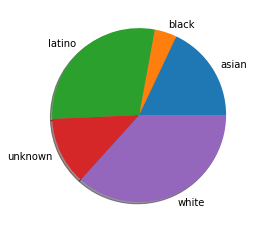

<IPython.core.display.Javascript object>

In [68]:
vacc_visual = vacc_race["race_ethnicity"].str.capitalize()
vacc_visual = vacc_race.groupby("race_ethnicity").sum()
labels = vacc_visual["fully_vaccinated"].index
plt.pie(vacc_visual["fully_vaccinated"], labels=labels, shadow=True)
vacc_visual
plt.show()

,confirmed_cases_total,confirmed_cases_percent,deaths_total,deaths_percent,population_percent
race,,,,,
asian,21734719,16.631,736395,30.484,37.209
black,13628520,10.540,419385,18.381,14.220
latino,163886171,135.160,2775920,109.029,92.193
other,36366152,29.113,161405,5.267,6.399
white,62175489,45.049,1872810,73.823,86.742


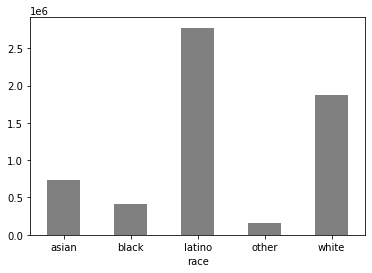

<IPython.core.display.Javascript object>

In [70]:
race = race.groupby("race").sum()
race["deaths_total"].plot(kind="bar", align="center", color="grey")
plt.xticks(rotation=0)
race

<AxesSubplot:xlabel='race'>

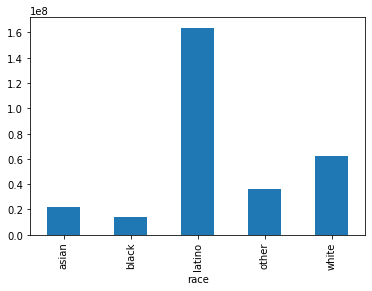

<IPython.core.display.Javascript object>

In [57]:
race["confirmed_cases_total"].plot(kind="bar")

<AxesSubplot:ylabel='deaths_total'>

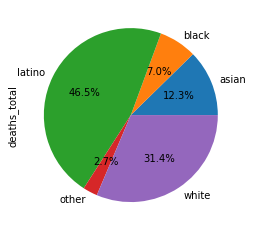

<IPython.core.display.Javascript object>

In [58]:
race["deaths_total"].plot(kind="pie",autopct = "%1.1f%%")

<AxesSubplot:ylabel='confirmed_cases_total'>

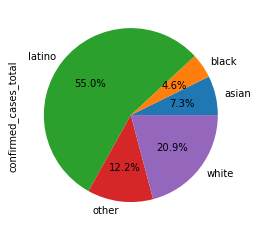

<IPython.core.display.Javascript object>

In [59]:
race["confirmed_cases_total"].plot(kind="pie", autopct="%1.1f%%")

<AxesSubplot:xlabel='age'>

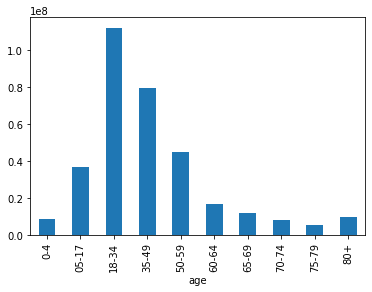

<IPython.core.display.Javascript object>

In [60]:
# in age df, we saw '17-May, so we changed it to 5-17'
vacc_age = age.replace(to_replace="17-May", value="05-17")
vacc_age_group = vacc_age.groupby("age").sum()
vacc_age_group["confirmed_cases_total"].plot(kind="bar")

<AxesSubplot:xlabel='age'>

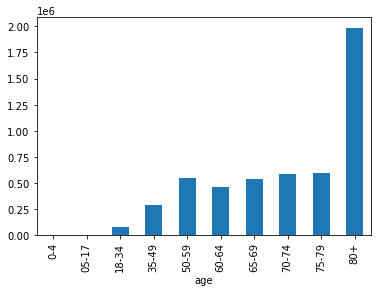

<IPython.core.display.Javascript object>

In [61]:
vacc_age_group["deaths_total"].plot(kind="bar")

<AxesSubplot:ylabel='deaths_total'>

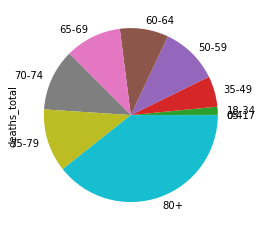

<IPython.core.display.Javascript object>

In [62]:
vacc_age_group["deaths_total"].plot(kind="pie")

<AxesSubplot:ylabel='confirmed_cases_total'>

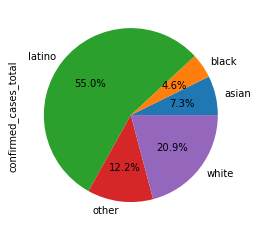

<IPython.core.display.Javascript object>

In [63]:
race["confirmed_cases_total"].plot(kind="pie", autopct="%1.1f%%")